In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load dataset from Google Drive
data_path = '/content/drive/My Drive/fer2013.csv'  # Change this to the actual path
data = pd.read_csv(data_path)


In [ ]:
def process_data(data):
    X = []
    y = []
    for i in range(len(data)):
        img = np.fromstring(data['pixels'][i], dtype=int, sep=' ').reshape(48, 48)
        X.append(img)
        y.append(data['emotion'][i])
    X = np.array(X).reshape(-1, 48, 48, 1)
    y = to_categorical(y, num_classes=len(data['emotion'].unique()))  # Dynamically adjust class count
    return X, y

X, y = process_data(data)
X = X / 255.0  # Normalize pixel values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture

In [ ]:

# Model architecture
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(data['emotion'].unique()), activation='softmax')  # Dynamically adjust class count
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 247s 545ms/step - accuracy: 0.2316 - loss: 2.6252 - val_accuracy: 0.1421 - val_loss: 10.7554
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 276s 576ms/step - accuracy: 0.3432 - loss: 2.0023 - val_accuracy: 0.3936 - val_loss: 1.9797
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 257s 566ms/step - accuracy: 0.3911 - loss: 1.8086 - val_accuracy: 0.4436 - val_loss: 1.8320
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 263s 567ms/step - accuracy: 0.4259 - loss: 1.6669 - val_accuracy: 0.4678 - val_loss: 1.5054
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 256s 554ms/step - accuracy: 0.4400 - loss: 1.5802 - val_accuracy: 0.4778 - val_loss: 1.5002
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 257s 542ms/step - accuracy: 0.4667 - loss: 1.4824 - val_accuracy: 0.4882 - val_loss: 1.5203
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 264s 547ms/step - accuracy: 0.4874 - loss: 1.4059 - val_accuracy: 0.4837 - val_loss: 1.6086
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 250s 521ms/step - accuracy: 0.5023 

Test Accuracy: 56.63%
Model saved at /content/drive/My Drive/face_expression_model.h5


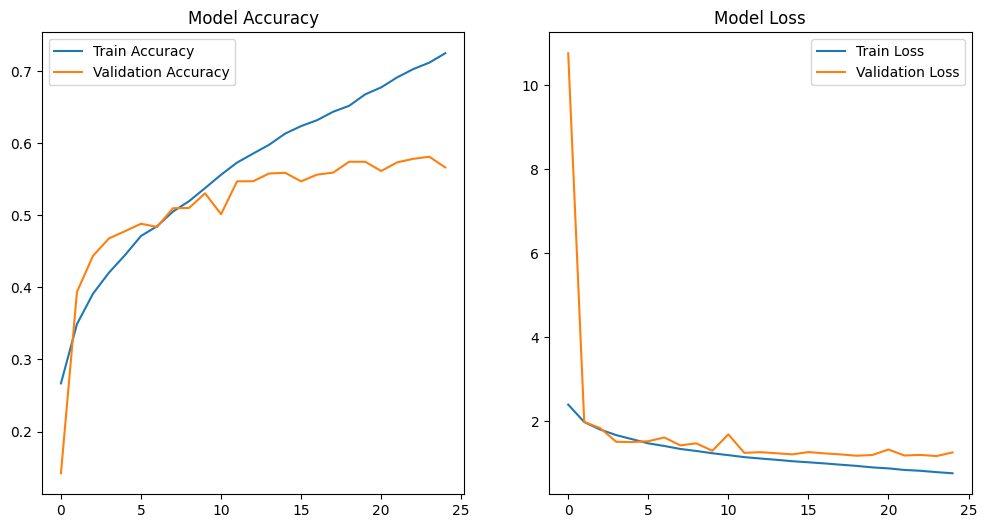

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Save model to Google Drive
model_path = '/content/drive/My Drive/face_expression_model.h5'
model.save(model_path)
print(f"Model saved at {model_path}")

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


